In [1]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def LeerArchivos():

    # Crear una ventana raíz
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal
    # Hacer que la ventana esté siempre en el frente
    root.attributes('-topmost', True)
    # Abrir un cuadro de diálogo para seleccionar un archivo CSV
    file_path = filedialog.askopenfilename(
        title="Selecciona un archivo CSV",
        filetypes=(("CSV files", "*.csv"), ("Todos los archivos", "*.*"))
    )

    # Mostrar la ruta del archivo seleccionado
    print(f"Archivo seleccionado: {file_path}")

    # Cerrar la ventana raíz
    root.destroy()
        
    if file_path:  # Verificar si se seleccionó un archivo
        try:
            df = pd.read_csv(file_path)
        except Exception as e:
            print(f"Error al leer el archivo: {e}")
    else:
        print("No se seleccionó ningún archivo.")
        
    # Borrar fechas
    df = df.iloc[:,1:]
        
    return df

In [5]:
def Estaciones():
    # Diccionario de DF por cada estación
    Estaciones = {}
    #
    Prob = [10, 25, 50, 75, 90]
    P = pd.DataFrame(np.zeros((5, 2)), columns=['Nivel', 'Probabilidad'])
    
    for columna in Datos.columns:
        # Crear un DataFrame para cada estación y ordenarlo
        est = Datos[[columna]].dropna().sort_values(by=columna, ascending=False).reset_index(drop=True)
        est['Probabilidad'] = 100*(est.index + 1) / (len(est) + 2)
        Estaciones[columna] = est
        
        i = 0
        
        #Valores en 10,25,50,75 y 90%
        for p in Prob:
            idx = (est.iloc[:, 1] - p).abs().idxmin()
            P.at[i, 'Nivel'] = "{:.2f}".format(est.iloc[idx, 0])
            P.at[i, 'Probabilidad'] = "{:.0f}".format(est.iloc[idx, 1])
            i = i + 1
            
        # Grafica
        plt.figure()
        plt.plot(est.iloc[:,1], est.iloc[:,0], linewidth = 3)
        plt.title(f'Curva de descarga de estación: {columna}')
        plt.xlabel("Probabilidad [%]")
        plt.yticks(np.linspace(est.iloc[-1,0], est.iloc[0,0], 5))
        plt.ylabel("Caudal [m3/s]")
        # Añadir una tabla con los datos del DataFrame
        plt.table(cellText = P.values, colLabels=P.columns,
                  cellLoc='center', loc='right')
    
    return Estaciones, P

Archivo seleccionado: C:/Users/juanj/OneDrive/Documentos/FONAG/Pronostico/Estaciones/H12/Niveles_H12.csv


C:\Users\juanj\AppData\Local\Temp\ipykernel_1388\2487042135.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '35.55' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  P.at[i, 'Nivel'] = "{:.2f}".format(est.iloc[idx, 0])
C:\Users\juanj\AppData\Local\Temp\ipykernel_1388\2487042135.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  P.at[i, 'Probabilidad'] = "{:.0f}".format(est.iloc[idx, 1])


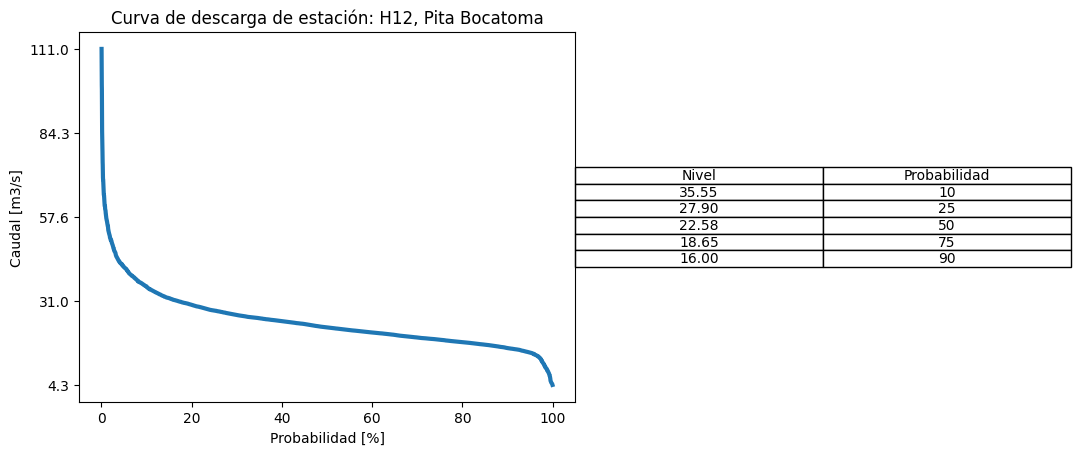

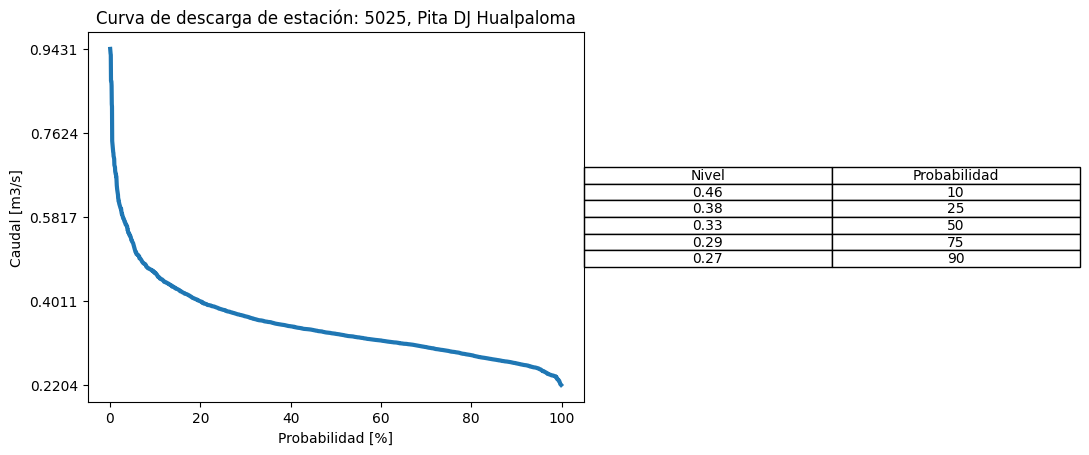

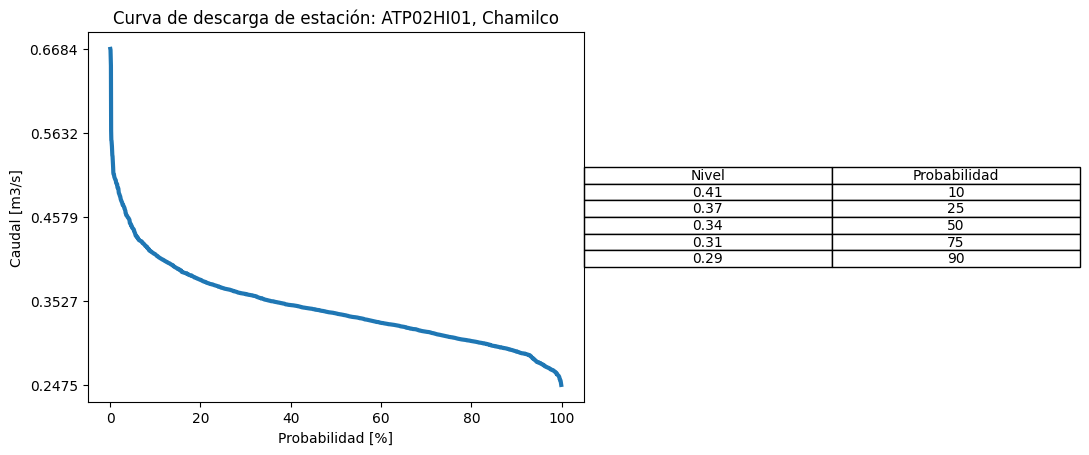

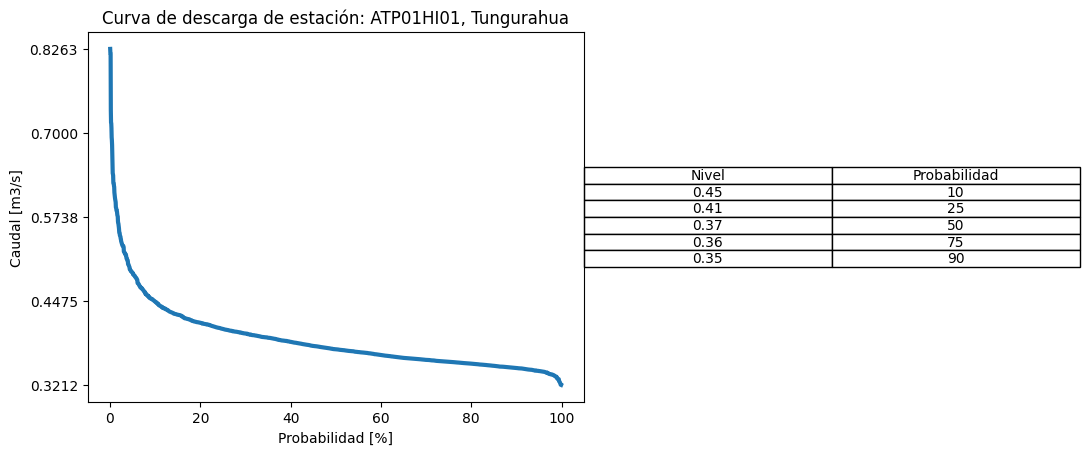

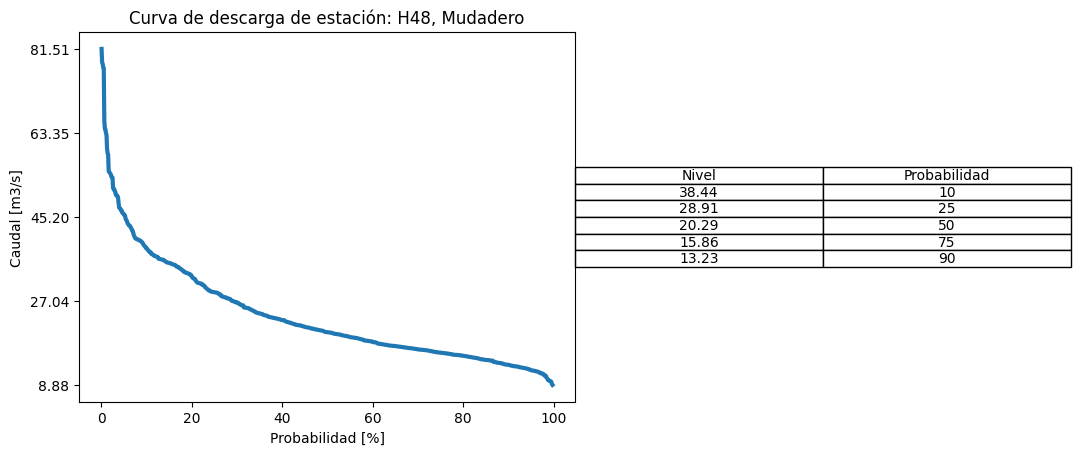

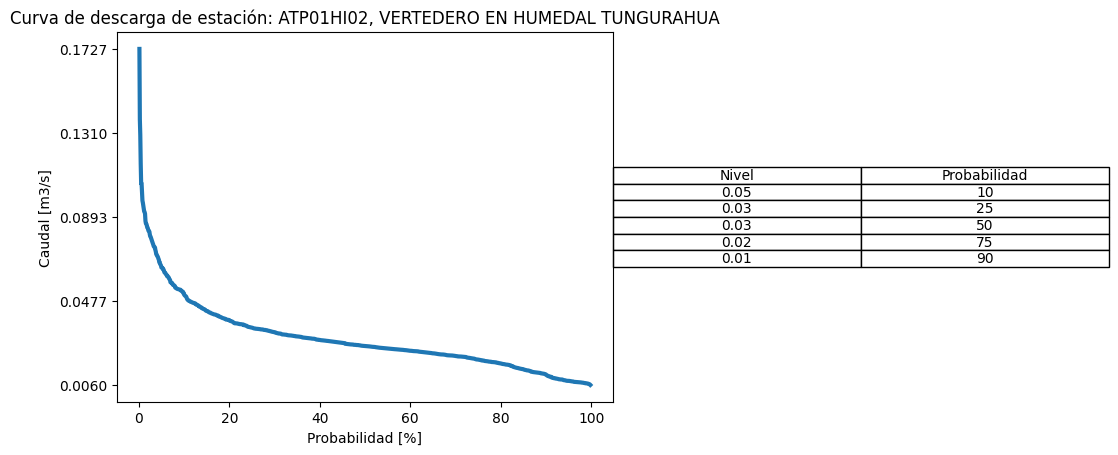

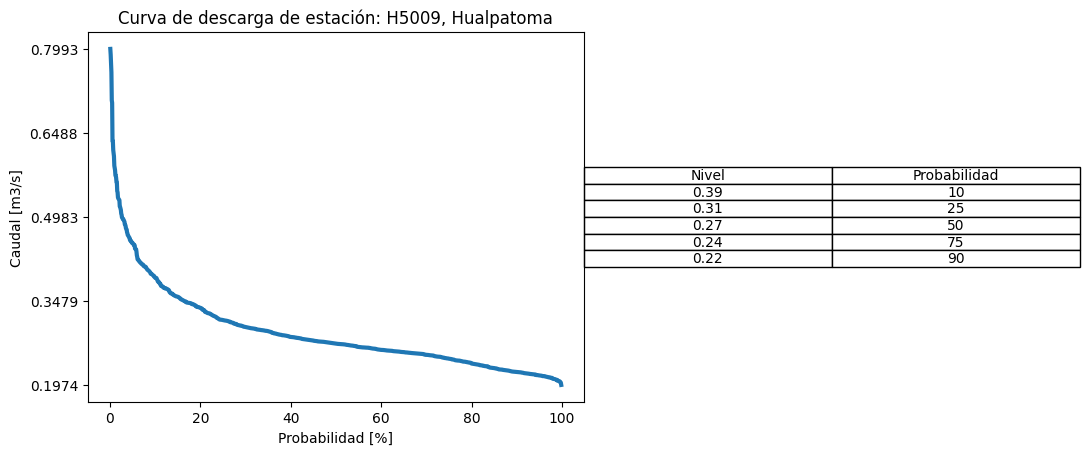

In [7]:
Datos = LeerArchivos()
Estaciones, P = Estaciones()